# Text Processing

1. Preprocessing:-

Preprocessing is one of the major steps when we are dealing with any kind of text models. During this stage we have to look at the distribution of our data, what techniques are needed and how deep we should clean.


a. Lowercase -

During the text processing each sentence is split to words and each word is considered as a token after preprocessing.
Programming languages consider textual data as sensitive, which means that The is different from the. we humans know that those both belong to same token but due to the character encoding those are considered as different tokens. Converting to lowercase is a very mandatory preprocessing step. As we have all our data in list, numpy has a method which can convert the list of lists to lowercase at once.


b. Stop words :-

Stop words are the most commonly occurring words which don’t give any additional value to the document vector. in-fact removing these will increase computation and space efficiency. nltk library has a method to download the stopwords, so instead of explicitly mentioning all the stopwords ourselves we can just use the nltk library and iterate over all the words and remove the stop words. There are many efficient ways to do this, but ill just give a simple method.
we are going to iterate over all the stop words and not append to the list if it’s a stop word
new_text = ""
for word in words:
    if word not in stop_words:
        new_text = new_text + " " + word


c. Punctuation:-

Punctuation are the unnecessary symbols that are in our corpus documents, we should be little careful with what we are doing with this. There might be few problems such as U.S — us “United Stated” being converted to “us” after the preprocessing. hyphen and should usually be dealt little carefully. but for this problem statement we are just going to remove these
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    
d. Apostrophe:-

Note that there is no ‘ apostrophe in the punctuation symbols. Because when we remove punctuation first it will convert don’t to dont, and it is a stop word which wont be removed. so what we are doing is we are first removing the stop words, and then symbols and then finally stopwords because few words might still have a apostrophe which are not stop words.


e. Single Characters:-

Single characters are not much useful in knowing the importance of the document and few final single characters might be irrelevant symbols, so it is always good be remove the single characters.
new_text = ""
for w in words:
    if len(w) > 1:
       new_text = new_text + " " + w
We just need to iterate to all the words and not append the word if the length is not greater than 1.

f. Lemmatisation:-

Lemmatisation is a way to reduce the word to root synonym of a word. Unlike Stemming, Lemmatisation makes sure that the reduced word is again a dictionary word (word present in the same language). WordNetLemmatizer can be used to lemmatize any word.

#####Stemming vs Lemmatization
stemming — need not be a dictionary word, removes prefix and affix based on few rules
lemmatization — will be a dictionary word. reduces to a root synonym.

g. Stemming:-

This is the final and most important part of the preprocessing. stemming converts words to its stem.
For example playing and played are the same type of words which basically indicate an action play. Stemmer does exactly this, it reduces the word to its stem. we are going to use a library called porter-stemmer which is a rule based stemmer. Porter-Stemmer identifies and removes the suffix or affix of a word. The words given by the stemmer need note be meaningful few times, but it will be identified as the same for the model.

####Note: A better efficient way to proceed is to first lemmatise and then stem, but stemming alone is also fine for few problems statements, in this problem statement we are not going to lemmatise.


i. Converting Numbers:-

When user gives a query such as 100 dollars or hundred dollars. For the user both those search terms are same. but out IR model treats them separately, as we are storing 100, dollar, hundred as different tokens. so to make our IR mode little better we need to convert 100 to hundred. To achieve this we are going to use a library called num2word.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
import nltk.corpus
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import re
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
#reading the corpora and displaying it
f = open(r'C:\Users\user-pc\NLP\smsspamcollection\SMSSpamCollection', mode='r')
message = []
for line in f.readlines():
    message.append(line.rstrip('\n'))

In [3]:
message[0:5]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though"]

In [4]:
print('The number of messages are {}'.format(len(message)))

The number of messages are 5574


In [5]:
#Importing the dataset
data= pd.read_csv(r'C:\Users\user-pc\NLP\smsspamcollection\SMSSpamCollection', sep='\t', header = None, names=['label', 'message'])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [6]:
#EDA
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


ham     4825
spam     747
Name: label, dtype: int64


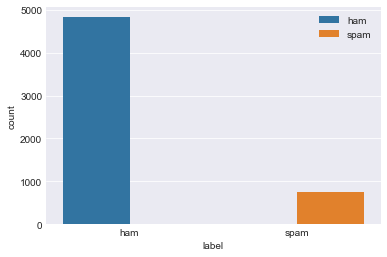

In [7]:
#Plot for label Data
print(data['label'].value_counts())
sns.set_style(style='darkgrid')
sns.countplot(data['label'], hue=data['label'])
plt.legend()
plt.show()

In [8]:
#gropuby for label
data.groupby(by='label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
#Checking for missing values
data.isna().sum()

label      0
message    0
dtype: int64

# Feature Engineering

In [10]:
#Feature Engineering
data['length'] = data['message'].apply(len)

spam_data= data.loc[data['label']=='spam']
ham_data= data.loc[data['label']=='ham']

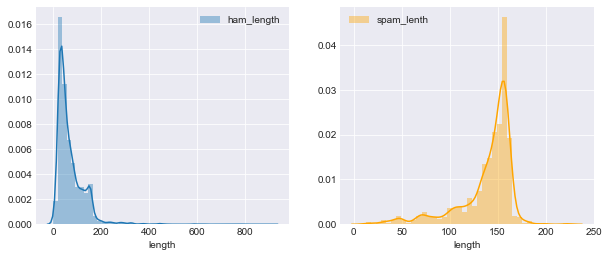

In [11]:
#Checking the length of spam and ham messages
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(ham_data['length'], label='ham_length')
plt.legend()
plt.subplot(122)
sns.distplot(spam_data['length'], label= 'spam_lenth', color='orange')
plt.legend()
plt.show()

In [12]:
spam_data['length'].describe()

count    747.000000
mean     138.670683
std       28.873603
min       13.000000
25%      133.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: length, dtype: float64

In [13]:
ham_data['length'].describe()

count    4825.000000
mean       71.482487
std        58.440652
min         2.000000
25%        33.000000
50%        52.000000
75%        93.000000
max       910.000000
Name: length, dtype: float64

In [14]:
#longest_message
data.loc[data['length']==910, 'message'][1085]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

# Test Preprocessing

In [15]:
#LowerCase
msg = data['message'][0]
msg = msg.lower()

#Stopwords
from nltk.tokenize import word_tokenize
msg = word_tokenize(msg, preserve_line=False)

#Stop word removal
from nltk.corpus import stopwords
msg = [words for words in msg if words not in stopwords.words('english')]

#punctuations removal
import string
msg = " ".join(msg)
nopunc = [c for c in msg if c not in string.punctuation]
nopunc = ''.join(nopunc)

# apostrope removal

#single character removal
msg = [words for words in nopunc.split() if len(words) >1]

#Lemmatization
from nltk import stem
word_lem = stem.WordNetLemmatizer()
msg = [word_lem.lemmatize(words) for words in msg]

#Stemming
from nltk.stem import PorterStemmer
pst = PorterStemmer()
msg = [pst.stem(word) for word in msg]
msg = ' '.join(msg)
msg

'go jurong point crazi avail bugi great world la buffet cine got amor wat'

In [16]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk import stem
from nltk.stem import PorterStemmer

def text_process(msg):
    #LowerCase
    msg = msg.lower()

    #Stopwords
    msg = word_tokenize(msg, preserve_line=False)

    #Stop word removal
    msg = [words for words in msg if words not in stopwords.words('english')]

    #punctuations removal
    msg = " ".join(msg)
    nopunc = [c for c in msg if c not in string.punctuation]
    nopunc = ''.join(nopunc)

    # apostrope removal

    #single character removal
    msg = [words for words in nopunc.split() if len(words) >1]

    #Lemmatization
    word_lem = stem.WordNetLemmatizer()
    msg = [word_lem.lemmatize(words) for words in msg]

    #Stemming
    pst = PorterStemmer()
    msg = [pst.stem(word) for word in msg]
    msg = ' '.join(msg)
    
    return msg
    

In [17]:
#Apply text processing to each message and calculating length again
data['message']= data['message'].apply(text_process)
data['new_length'] = data['message'].apply(len)
data.head()

,label,message,length,new_length
0,ham,go jurong point crazi avail bugi great world l...,111,72
1,ham,ok lar joke wif oni,29,19
2,spam,free entri wkli comp win fa cup final tkt 21st...,155,128
3,ham,dun say earli hor alreadi say,49,29
4,ham,nah nt think go usf life around though,61,38


In [18]:
#After text processing lets calculate the new_length 
spam_data_new= data.loc[data['label']=='spam']
ham_data_new= data.loc[data['label']=='ham']

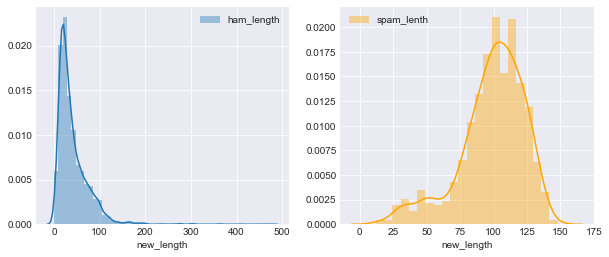

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,40.837306,34.303818,0.0,19.0,30.0,54.0,475.0
spam,747.0,98.871486,24.419690,12.0,87.0,102.0,116.0,148.0


In [19]:
#Plot
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(ham_data_new['new_length'], label='ham_length')
plt.legend()
plt.subplot(122)
sns.distplot(spam_data_new['new_length'], label= 'spam_lenth', color='orange')
plt.legend()
plt.show()

data.groupby(by = 'label')['new_length'].describe()

# Bag Of words

In [20]:
#Vectorization
from sklearn.feature_extraction.text import CountVectorizer
#Binary bag of words
count_vector = CountVectorizer(binary=True)

In [21]:
binary_bow= count_vector.fit(data['message'])
binary_bow.get_params

<bound method BaseEstimator.get_params of CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)>

In [22]:
# Print total number of vocab words
print(len(binary_bow.vocabulary_))
[v for v in binary_bow.vocabulary_.items()][0:5]

### we have 7776 words in our vocabulary 

7776


[('go', 3245),
 ('jurong', 3970),
 ('point', 5372),
 ('crazi', 2189),
 ('avail', 1322)]

In [23]:
### lets take the 4th message from our message dataframe 
message4 = data['message'][3]
print(message4)
print('\n')

### use the bow_transformer and call transform function on the test message "message4"
bow4 = binary_bow.transform([message4])
print(bow4)
print('\n')
### .transform outputs the sparse matrix of indexes along with the number of times each word occurs in that index.

print(type(bow4))
print('\n')
print(bow4.ndim)
print(bow4.shape)
print('\n')

#Checking the colums are correct for words or not
print(binary_bow.get_feature_names()[1103])
print(binary_bow.get_feature_names()[2602])
print(binary_bow.get_feature_names()[2618])
print(binary_bow.get_feature_names()[3590])
print(binary_bow.get_feature_names()[5954])

dun say earli hor alreadi say


  (0, 1103)	1
  (0, 2602)	1
  (0, 2618)	1
  (0, 3590)	1
  (0, 5954)	1


<class 'scipy.sparse.csr.csr_matrix'>


2
(1, 7776)


alreadi
dun
earli
hor
say


Now we can use **.transform** on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages.

Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix:

In [24]:
#Transforming
bag_of_words= binary_bow.transform(data['message'])

In [25]:
### check the shape of the sparse matrix using .shape
print('Shape of Sparse Matrix: ', bag_of_words.shape)

### check the amount of non zero occurrences using .nnz
print('Amount of Non-Zero occurences: ', bag_of_words.nnz)

Shape of Sparse Matrix:  (5572, 7776)
Amount of Non-Zero occurences:  47143


In [26]:
sparsity = (100.0 * bag_of_words.nnz / (bag_of_words.shape[0] * bag_of_words.shape[1]))

print('sparsity: {}'.format((sparsity)))
## sparsity counts the number of non zero messages vs the total number of messages

sparsity: 0.1088052512710525


# TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_vect= tfidf_vect.fit(data['message'])

In [28]:
# Print total number of vocab words
print(len(tfidf_vect.vocabulary_))
tfidf_vect.vocabulary_

### we have 7776 words in our vocabulary 

7776


{'go': 3245,
 'jurong': 3970,
 'point': 5372,
 'crazi': 2189,
 'avail': 1322,
 'bugi': 1712,
 'great': 3326,
 'world': 7552,
 'la': 4098,
 'buffet': 1710,
 'cine': 1975,
 'got': 3288,
 'amor': 1133,
 'wat': 7364,
 'ok': 5015,
 'lar': 4131,
 'joke': 3939,
 'wif': 7471,
 'oni': 5045,
 'free': 3068,
 'entri': 2726,
 'wkli': 7517,
 'comp': 2069,
 'win': 7484,
 'fa': 2846,
 'cup': 2241,
 'final': 2944,
 'tkt': 6887,
 '21st': 450,
 'may': 4470,
 '2005': 436,
 'text': 6755,
 '87121': 858,
 'receiv': 5689,
 'question': 5603,
 'std': 6453,
 'txt': 7062,
 'rate': 5647,
 'appli': 1205,
 '08452810075over18': 71,
 'dun': 2602,
 'say': 5954,
 'earli': 2618,
 'hor': 3590,
 'alreadi': 1103,
 'nah': 4743,
 'nt': 4938,
 'think': 6816,
 'usf': 7195,
 'life': 4200,
 'around': 1243,
 'though': 6831,
 'freemsg': 3076,
 'hey': 3510,
 'darl': 2291,
 'week': 7401,
 'word': 7545,
 'back': 1364,
 'like': 4212,
 'fun': 3127,
 'still': 6475,
 'tb': 6702,
 'xxx': 7668,
 'chg': 1927,
 'send': 6026,
 '150': 351,
 'rc

In [29]:
### lets take the 4th message from our message dataframe 
message4 = data['message'][3]
print(message4)
tfidf4 = tfidf_vect.transform([data['message'][3]])
print(tfidf4)
print(type(tfidf4))
print(tfidf4.ndim)
print(tfidf4.shape)

dun say earli hor alreadi say
  (0, 5954)	0.5891619109630268
  (0, 3590)	0.5296171749437789
  (0, 2618)	0.38259500135115204
  (0, 2602)	0.3524400850864092
  (0, 1103)	0.31906259893688826
<class 'scipy.sparse.csr.csr_matrix'>
2
(1, 7776)


In [30]:
#Transforming
tfidf= tfidf_vect.transform(data['message'])

In [31]:
### check the shape of the sparse matrix using .shape
print('Shape of Sparse Matrix: ', tfidf.shape)

### check the amount of non zero occurrences using .nnz
print('Amount of Non-Zero occurences: ', tfidf.nnz)

Shape of Sparse Matrix:  (5572, 7776)
Amount of Non-Zero occurences:  47143


In [32]:
sparsity = (100.0 * tfidf.nnz / (tfidf.shape[0] * tfidf.shape[1]))

print('sparsity: {}'.format((sparsity)))
## sparsity counts the number of non zero messages vs the total number of messages

sparsity: 0.1088052512710525


# Model Building

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
#Naive bayes for Bag of word data

#Train test split for bag_of_words data
X_train, X_test, Y_train, Y_test = train_test_split(bag_of_words, data['label'], test_size = 0.25, random_state=1)

#Building naive bayes model for BOW data
from sklearn.naive_bayes import MultinomialNB
naive_bayes_bow= MultinomialNB()
naive_bayes_bow.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
#Naive bayes for Tfidf data data

#Train test split for tfidf data
x_train, x_test, y_train, y_test = train_test_split(tfidf, data['label'], test_size = 0.25, random_state=1)

#Building naive bayes model for tfidf data
naive_bayes_tfidf= MultinomialNB()
naive_bayes_tfidf.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
#Metrics for Bag of words model
print('The shape of X_train is {}'.format(X_train.shape))
print('The shape of X_test is {}'.format(X_test.shape))
print('\n')
print('The accuracy for Binary BOW model is {}'.format(accuracy_score(Y_test, naive_bayes_bow.predict(X_test))))
print('\n')
print('The confusion matrix for Binary BOW model is :')
print(confusion_matrix(Y_test, naive_bayes_bow.predict(X_test)))
print('\n')
print('The classification report for Binary BOW model is :')
print(classification_report(Y_test, naive_bayes_bow.predict(X_test)))

The shape of X_train is (4179, 7776)
The shape of X_test is (1393, 7776)


The accuracy for Binary BOW model is 0.9827709978463748


The confusion matrix for Binary BOW model is :
[[1193   15]
 [   9  176]]


The classification report for Binary BOW model is :
             precision    recall  f1-score   support

        ham       0.99      0.99      0.99      1208
       spam       0.92      0.95      0.94       185

avg / total       0.98      0.98      0.98      1393



In [37]:
#Metrics for TFIDF Naive Bayes model
print('The shape of x_train is {}'.format(x_train.shape))
print('The shape of x_test is {}'.format(x_test.shape))
print('\n')
print('The accuracy for TFIDF Naive Bayes model is {}'.format(accuracy_score(y_test, naive_bayes_tfidf.predict(x_test))))
print('\n')
print('The confusion matrix for TFIDF Naive Bayes model is :')
print(confusion_matrix(y_test, naive_bayes_tfidf.predict(x_test)))
print('\n')
print('The classification report for TFIDF Naive Bayes model is :')
print(classification_report(y_test, naive_bayes_tfidf.predict(x_test)))

The shape of x_train is (4179, 7776)
The shape of x_test is (1393, 7776)


The accuracy for TFIDF Naive Bayes model is 0.9662598707824839


The confusion matrix for TFIDF Naive Bayes model is :
[[1208    0]
 [  47  138]]


The classification report for TFIDF Naive Bayes model is :
             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1208
       spam       1.00      0.75      0.85       185

avg / total       0.97      0.97      0.96      1393



In [38]:
#Random Forest model for TFIDF data
from sklearn.ensemble import RandomForestClassifier
rf_tfidf = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=1)
rf_tfidf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [39]:
#Metrics for TFIDF Random Forest model
print('The shape of x_train is {}'.format(x_train.shape))
print('The shape of x_test is {}'.format(x_test.shape))
print('\n')
print('The accuracy for TFIDF Random Forest model is {}'.format(accuracy_score(y_test, rf_tfidf.predict(x_test))))
print('\n')
print('The confusion matrix for TFIDF Random Forest model is :')
print(confusion_matrix(y_test, rf_tfidf.predict(x_test)))
print('\n')
print('The classification report for TFIDF Random Forest model is :')
print(classification_report(y_test, rf_tfidf.predict(x_test)))

The shape of x_train is (4179, 7776)
The shape of x_test is (1393, 7776)


The accuracy for TFIDF Random Forest model is 0.9770279971284996


The confusion matrix for TFIDF Random Forest model is :
[[1208    0]
 [  32  153]]


The classification report for TFIDF Random Forest model is :
             precision    recall  f1-score   support

        ham       0.97      1.00      0.99      1208
       spam       1.00      0.83      0.91       185

avg / total       0.98      0.98      0.98      1393



## here for the test train split we are just grabbing the text messages.

1) the ideal way to do is after train test split, run the bag of wods, count vectorization, transformation and tf-idf process , run multinomial Naive Bayes Process and predict. 

2) but python's scikit learn offers a very simple solution called data pipeline for this purpose. this is basically a pipeline
   of our workflow . Enterprise solutions are offered using pipeline feature
   
   

## Creating a Data Pipeline

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [41]:
msg_train, msg_test, label_train, label_test = train_test_split(data['message'], data['label'], test_size=0.3)

In [42]:
### observe we have summarized all the steps we did in the Pipleine which takes a list of every process we did so far
estimators =[('bow', CountVectorizer(analyzer=text_process)), ('log_reg', LogisticRegression())]
pipeline = Pipeline(estimators)

In [43]:
#Now we can directly pass message text data and the pipeline will do our pre-processing 
##We can treat it as a model/estimator API:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000194650F1598>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [44]:
#Metrics for Pipeline model
print('The shape of msg_train is {}'.format(msg_train.shape))
print('The shape of msg_test is {}'.format(msg_test.shape))
print('\n')
print('The accuracy for Pipeline Log Reg model is {}'.format(accuracy_score(label_test, pipeline.predict(msg_test))))
print('\n')
print('The confusion matrix for TFIDF Random Forest model is :')
print(confusion_matrix(label_test, pipeline.predict(msg_test)))
print('\n')
print('The classification report for TFIDF Random Forest model is :')
print(classification_report(label_test, pipeline.predict(msg_test)))

The shape of msg_train is (3900,)
The shape of msg_test is (1672,)


The accuracy for Pipeline Log Reg model is 0.9778708133971292


The confusion matrix for TFIDF Random Forest model is :
[[1445   12]
 [  25  190]]


The classification report for TFIDF Random Forest model is :
             precision    recall  f1-score   support

        ham       0.98      0.99      0.99      1457
       spam       0.94      0.88      0.91       215

avg / total       0.98      0.98      0.98      1672

